In [ ]:
import os
import numpy as np

clus_GZ = '../data/compressed/input_clus_radar/'
clus_RAW = '../data/uncompressed/input_clus_radar'

In [ ]:
def unzip(path):
    for file in os.listdir(path):
        !bash unzip_file.sh {file}
        
def readDataClus(path):
    icr = {}
    for file in os.listdir(path):
        input_clus_radar = np.fromfile('../data/uncompressed/input'+file,dtype='float32')
        input_clus_radar = np.array(input_clus_radar)
        input_clus_radar = np.reshape(input_clus_radar, (241,241))
        ans[file] = [input_clus_radar, "coords"]
    return icr

def getCoords(cluster):
    x = 0
    y = 0
    vx = []
    vy = []

    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if cluster[x][y] != 0:
                vx.append(x)
                vy.append(y)
            y += 1
        x += 1
        y = 0
        
    return vx,vy

In [ ]:
unzip(clus_GZ)

In [ ]:
dados = readData(RAW)

In [ ]:
k = list(dados.keys())
cluster = dados[k[0]][0]

In [ ]:
dados

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,2, figsize=(10,6))

kk = []
for cluster in dados.keys():
    kk.append(getCoords(dados[cluster][0]))
    
ax[0][0].scatter(kk[0][0], kk[0][1])

ax[0][1].scatter(kk[1][0], kk[1][1])
# ax[0][1].scatter()

ax[1][0].scatter(kk[2][0], kk[2][1])
# ax[1][0].scatter()

ax[1][1].scatter(kk[3][0], kk[3][1])
# ax[1][1].scatter()

plt.show()

In [ ]:
#comp = np.fromfile('../data/compressed/input_img_radar/R12345678_201402010000.raw.gz',dtype='float32')
uncomp = np.fromfile('../data/uncompressed/input_img_radar/R12345678_201402010000.raw',dtype='float32')

In [ ]:
uncomp

V = 20, X = 46, Y = 88
V = 20, X = 46, Y = 92
V = 20, X = 46, Y = 93
V = 21, X = 47, Y = 86
V = 21, X = 47, Y = 87
V = 20, X = 47, Y = 88
V = 21, X = 47, Y = 89
V = 21, X = 47, Y = 90
V = 20, X = 47, Y = 91
V = 20, X = 47, Y = 92
V = 20, X = 47, Y = 93
V = 20, X = 48, Y = 87
V = 20, X = 48, Y = 88
V = 20, X = 48, Y = 89
V = 22, X = 48, Y = 90
V = 22, X = 48, Y = 91
V = 22, X = 48, Y = 92
V = 20, X = 48, Y = 93
V = 20, X = 48, Y = 94
V = 20, X = 48, Y = 95
V = 20, X = 49, Y = 87
V = 20, X = 49, Y = 88
V = 21, X = 49, Y = 89
V = 24, X = 49, Y = 90
V = 24, X = 49, Y = 91
V = 23, X = 49, Y = 92
V = 21, X = 49, Y = 93
V = 22, X = 49, Y = 94
V = 22, X = 49, Y = 95
V = 20, X = 50, Y = 87
V = 20, X = 50, Y = 88
V = 20, X = 50, Y = 89
V = 20, X = 50, Y = 90
V = 23, X = 50, Y = 91
V = 24, X = 50, Y = 92
V = 24, X = 50, Y = 93
V = 25, X = 50, Y = 94
V = 22, X = 50, Y = 95
V = 24, X = 50, Y = 96
V = 19, X = 51, Y = 88
V = 19, X = 51, Y = 89
V = 20, X = 51, Y = 90
V = 21, X = 51, Y = 91
V = 22, X =

V = 7, X = 102, Y = 107
V = 6, X = 102, Y = 108
V = 5, X = 102, Y = 109
V = 5, X = 102, Y = 110
V = 5, X = 102, Y = 111
V = 4, X = 102, Y = 112
V = 4, X = 102, Y = 113
V = 4, X = 102, Y = 114
V = 4, X = 102, Y = 115
V = 4, X = 102, Y = 116
V = 3, X = 102, Y = 117
V = 4, X = 102, Y = 118
V = 4, X = 102, Y = 119
V = 4, X = 102, Y = 120
V = 5, X = 102, Y = 121
V = 5, X = 102, Y = 122
V = 5, X = 102, Y = 123
V = 4, X = 102, Y = 124
V = 4, X = 102, Y = 125
V = 4, X = 102, Y = 126
V = 4, X = 102, Y = 127
V = 5, X = 102, Y = 128
V = 5, X = 102, Y = 129
V = 5, X = 102, Y = 130
V = 5, X = 102, Y = 131
V = 5, X = 102, Y = 132
V = 5, X = 102, Y = 133
V = 6, X = 102, Y = 134
V = 6, X = 102, Y = 135
V = 6, X = 102, Y = 136
V = 6, X = 102, Y = 137
V = 6, X = 102, Y = 138
V = 7, X = 102, Y = 140
V = 7, X = 102, Y = 141
V = 8, X = 102, Y = 142
V = 8, X = 102, Y = 143
V = 7, X = 102, Y = 144
V = 8, X = 102, Y = 148
V = 9, X = 102, Y = 149
V = 10, X = 102, Y = 150
V = 10, X = 102, Y = 151
V = 10, X = 10

V = 20, X = 117, Y = 135
V = 21, X = 117, Y = 136
V = 20, X = 117, Y = 137
V = 18, X = 117, Y = 138
V = 17, X = 117, Y = 139
V = 16, X = 117, Y = 140
V = 13, X = 117, Y = 141
V = 9, X = 117, Y = 142
V = 7, X = 117, Y = 143
V = 8, X = 117, Y = 144
V = 8, X = 117, Y = 145
V = 8, X = 117, Y = 146
V = 9, X = 117, Y = 147
V = 10, X = 117, Y = 148
V = 9, X = 117, Y = 149
V = 9, X = 117, Y = 150
V = 10, X = 117, Y = 151
V = 12, X = 117, Y = 152
V = 13, X = 117, Y = 153
V = 14, X = 117, Y = 154
V = 13, X = 117, Y = 155
V = 11, X = 117, Y = 156
V = 11, X = 117, Y = 157
V = 12, X = 117, Y = 158
V = 11, X = 117, Y = 159
V = 11, X = 117, Y = 160
V = 11, X = 117, Y = 161
V = 12, X = 117, Y = 162
V = 11, X = 117, Y = 163
V = 12, X = 117, Y = 164
V = 12, X = 117, Y = 165
V = 12, X = 117, Y = 166
V = 12, X = 117, Y = 167
V = 14, X = 117, Y = 168
V = 8, X = 118, Y = 94
V = 8, X = 118, Y = 95
V = 6, X = 118, Y = 101
V = 6, X = 118, Y = 102
V = 6, X = 118, Y = 103
V = 5, X = 118, Y = 104
V = 5, X = 118, 

V = 8, X = 147, Y = 100
V = 8, X = 147, Y = 101
V = 8, X = 147, Y = 108
V = 8, X = 147, Y = 109
V = 8, X = 147, Y = 110
V = 9, X = 147, Y = 111
V = 8, X = 147, Y = 112
V = 8, X = 147, Y = 113
V = 8, X = 147, Y = 114
V = 9, X = 147, Y = 116
V = 10, X = 147, Y = 117
V = 11, X = 147, Y = 118
V = 13, X = 147, Y = 119
V = 16, X = 147, Y = 120
V = 18, X = 147, Y = 121
V = 18, X = 147, Y = 122
V = 18, X = 147, Y = 123
V = 18, X = 147, Y = 124
V = 17, X = 147, Y = 125
V = 14, X = 147, Y = 126
V = 13, X = 147, Y = 127
V = 13, X = 147, Y = 128
V = 9, X = 148, Y = 97
V = 9, X = 148, Y = 98
V = 8, X = 148, Y = 109
V = 8, X = 148, Y = 110
V = 8, X = 148, Y = 111
V = 8, X = 148, Y = 112
V = 7, X = 148, Y = 113
V = 8, X = 148, Y = 114
V = 10, X = 148, Y = 115
V = 9, X = 148, Y = 116
V = 11, X = 148, Y = 117
V = 11, X = 148, Y = 118
V = 12, X = 148, Y = 119
V = 14, X = 148, Y = 120
V = 14, X = 148, Y = 121
V = 16, X = 148, Y = 122
V = 17, X = 148, Y = 123
V = 17, X = 148, Y = 124
V = 16, X = 148, Y = 

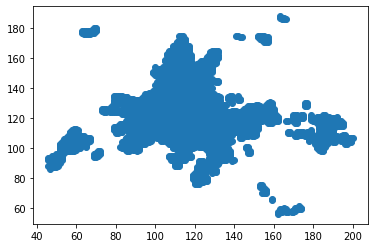

In [341]:
import gzip
import matplotlib.pyplot as plt

f = gzip.GzipFile('../data/input_img_radar/R12345678_201402010000.raw.gz')
event_dtype = np.dtype('float32')
s = f.read()
event = np.frombuffer(s, dtype=event_dtype)

dados = np.array(event)
dados = np.reshape(dados, (241,241))

vx, vy = [], []
x, y = 0, 0
for i in range(len(dados)):
    for j in range(len(dados)):
        if dados[x][y] != 0:
            vx.append(x)
            vy.append(y)
            print('V = %d, X = %d, Y = %d'%(dados[i][j], x, y))
        y += 1
    x+=1
    y=0
plt.scatter(vx,vy)

In [102]:
import os
import numpy as np
import gzip
import matplotlib.pyplot as plt

In [90]:
PATH = '../data'

In [98]:
def readRef(path):
    ans = {}
    for file in os.listdir(path+'/input_img_radar'):
        f = gzip.GzipFile(path+'/input_img_radar/'+(file))
        event_dtype = np.dtype('float32')
        s = f.read()
        event = np.frombuffer(s, dtype=event_dtype)
        dados = np.array(event)
        dados = np.reshape(dados, (241,241))
        s = str(file)
        l = list(s)
        del(l[0:10])
        del(l[-7:])
        s = "".join(l)
        ans[s] = dados      
    return ans

def getCoords(coords):
    clusters = {}
    k = list(coords.keys())

    for c in sorted(k):
#         print(coords[c])
        clusters[c] = {}
        clusters[c]['vx'] = []
        clusters[c]['vy'] = []
        clusters[c]['vi'] = []
        for ii in range(241):
            for jj in range(241):
                if coords[c][ii][jj] != 0:
                    clusters[c]['vx'].append(ii)
                    clusters[c]['vy'].append(jj)
                    clusters[c]['vi'].append(coords[c][ii][jj])
                
                
    return clusters
#         for i in range(241):
#             for j in range(241):
#                 pass
# #                 print(c)
#                 if c[0][i][j] != 0:
#                     clusters[c[0]]['vx'].append(i)
#                     clusters[c[0]]['vy'].append(j)
#                     clusters[c[0]]['vi'].append(c[i][j])
                    
#     return clusters
        #print (c)
        #print ('Elemenco C: ',c , 'Valores:', coords[c])
        
        #print (coords[c])
#         for i in range(len(k)):R12345678_201402010000
#             for j in range(len(k)):

           

#         for i in range(len(v)):
#             for j in range(len(v)):
#                 #if all(v[i][c][0]) != 0:
#                 if (v[i][c][c]) and (v[j][c][c]) != 0:
#                     vx.append(i)
#                     vy.append(j)
#                     print(vy)
#                    print ( 'X de: ', c ,"", v[i][c][c], 'Y de : ',c,"",v[j][c][c])

                    
#                     print("Elemento", c, " Valor de X: ", v[i][c], "Valor de Y", v[j][c])

    
   
#     for k in coords:
#         for i in range(len(coords)):
#             for j in range(len(coords)):
#                 if coords[x][y] != 0:
#                     vx.append(x)
#                     vy.append(y)
#                     print('V = %d, X = %d, Y = %d'%(coords[x][y], x, y))
#                 y += 1
#             x+=1
#             y=0

In [99]:
ref = readRef(PATH)

clusters = getCoords(ref)
# for x in ref.keys():
#     print(x)
# ref['201402011748']

In [109]:
tamanho = np.array(clusters['201402010000']['vi'])*10

/ssd/miniconda3/envs/goamazon/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


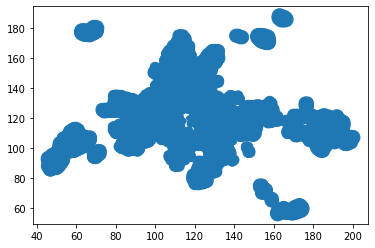

In [110]:
plt.scatter(clusters['201402010000']['vx'],clusters['201402010000']['vy'], tamanho)

In [6]:
k = list(ref.keys())
cluster = ref[k[0]]

sorted(ref[k[0]])

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [7]:
ref['201402010000'][-1][80]

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      , 

In [226]:
import numpy as np

dt = np.dtype('float32')

dado = np.fromfile('../goamazon/input_img_radar/R12345678_201402010000.raw' ,dtype=dt)
dado = np.array(dado)
dado = np.reshape(dado, (241,241))

np.shape(dado)
np.savetxt("../goamazon/input_img_radar/R12345678_201402010000.raw.csv", dado, delimiter=",")

In [284]:
dado = np.fromfile('../goamazon/input_clus_radar/R12345678_201402010000.raw' ,dtype='float16')
#dado = np.reshape(dado,(241,241))

dado = np.reshape(dado,(241,241))

np.savetxt("../goamazon/input_clus_radar/R12345678_201402010000.raw.csv", dado, delimiter=",")

In [175]:
dado = np.fromfile('../goamazon/20140201.0000.cXe_2.5km.bin' ,dtype='float16')
dado = np.reshape(dado,(241,241))


#np.sqrt(len(dado))
np.savetxt("../goamazon/20140201.0000.cXe_2.5km.bin.csv", dado, delimiter=",")

In [177]:
dado = np.fromfile('../goamazon/20140201.0000.prec_2.5km.bin' ,dtype='float32')
dado = np.reshape(dado,(241,241))


#np.sqrt(len(dado))
np.savetxt("../goamazon/20140201.0000.prec_2.5km.bin.csv", dado, delimiter=",")